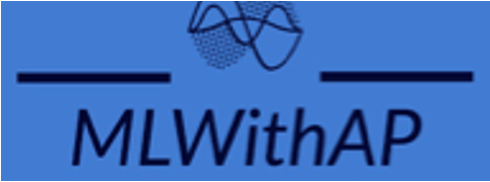

# Comparisons, Masks, and Boolean Logic

In [86]:
import numpy as np
x = np.array([1, 2, 3, 4, 5])

In [58]:
x

array([1, 2, 3, 4, 5])

In [59]:
x < 3  # less than

array([ True,  True, False, False, False])

In [87]:
x > 3  # greater than


array([False, False, False,  True,  True])

In [88]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [89]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [90]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [91]:
x == 3  # equal

array([False, False,  True, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [65]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])



| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

works on all ndimarrays

In [92]:
x = np.arange(12).reshape(3,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [93]:
x < 6

array([[ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False, False, False]])

In each case, the result is a Boolean array 

## Working with Boolean Arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with ``x``, the two-dimensional array we created earlier.

In [68]:
print(x)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### Why sum is 6 ?

In [95]:
np.sum(x < 6)

6

In [94]:
x<6

array([[ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False, False, False]])

In [73]:
x < 6

array([[ True,  True,  True,  True],
       [ True,  True, False, False],
       [False, False, False, False]])

True is 1 and False is 0 . Sum of all will be = number of 1s and hence 6.

The benefit of ``sum()`` is that like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [74]:
# how many values less than 6 in each row?
np.sum(x < 6, axis=1)

array([4, 2, 0])

In [96]:
# are there any values greater than 8?
np.any(x > 8)

True

In [97]:
# are there any values less than zero?
np.any(x < 0)

False

In [100]:
# are all values less than 10?
np.all(x < 100)

True

In [99]:
# are all values equal to 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [101]:
# are all values in each row less than 8?
np.all(x < 8, axis=1)

array([ True,  True, False])

## Boolean Arrays as Masks



In [102]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

We can obtain a Boolean array for this condition easily, as we've already seen:

In [103]:
x < 5

array([[ True,  True,  True,  True],
       [ True, False, False, False],
       [False, False, False, False]])

Now to *select* these values from the array, we can simply index on this Boolean array; this is known as a **masking** operation:

In [104]:
x[x < 5]

array([0, 1, 2, 3, 4])

What is returned is a one-dimensional array filled with all the values that meet this condition; in other words, all the values in positions at which the mask array is ``True``.

We are then free to operate on these values as we wish.


In [105]:
#Let's create a dummy array of marks obtained by 10 students in 5 subjects. Subjects are columns, Rows are student

marks = np.random.randint(0,100 , size = (10,5) , dtype = int)
marks

array([[89, 91, 60, 60, 83],
       [42, 60, 30,  6, 43],
       [22, 70, 61, 45, 26],
       [28, 39, 55, 24, 64],
       [95, 54, 56, 81,  4],
       [42, 11, 35, 61, 76],
       [19, 99, 39, 49, 58],
       [19, 18, 19, 14, 41],
       [15, 27, 67,  8, 13],
       [88, 19, 66, 21, 92]])

In [106]:
# construct a mask of who failed ( less than 40 )
failed = (marks < 40)
failed
#failed is mask array

array([[False, False, False, False, False],
       [False, False,  True,  True, False],
       [ True, False, False, False,  True],
       [ True,  True, False,  True, False],
       [False, False, False, False,  True],
       [False,  True,  True, False, False],
       [ True, False,  True, False, False],
       [ True,  True,  True,  True, False],
       [ True,  True, False,  True,  True],
       [False,  True, False,  True, False]])

In [107]:
#Those who got Grade A
GradeA = (marks > 90) 
GradeA

array([[False,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False, False, False],
       [False, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False,  True]])

In [108]:
# Rest of Students who pass

AverageStudents = (marks > 40 ) & (marks < 90)
AverageStudents

array([[ True, False,  True,  True,  True],
       [ True,  True, False, False,  True],
       [False,  True,  True,  True, False],
       [False, False,  True, False,  True],
       [False,  True,  True,  True, False],
       [ True, False, False,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True],
       [False, False,  True, False, False],
       [ True, False,  True, False, False]])

In [109]:
#Mean score of Avergae Students 

np.mean(marks[AverageStudents])

61.291666666666664

In [84]:
#Mean score of Avergae Students ; subject wise 

np.mean(marks[AverageStudents],axis = 0)

62.69230769230769